Reproduce results from attempt 3 (20180910)

In [35]:
%matplotlib inline
%run batch_SG_analysis.py

In [9]:
test1 = SgFinder("/Users/colinrathbun/Research/imaging/20180910/20180910_A1_1.nd2", 35)
test1.median_filter(2)

In [10]:
test1.setHaloThreshold()

interactive(children=(IntSlider(value=0, description='threshold_value', max=3000, step=10), Output()), _dom_cl…

In [12]:
test1.dilate_and_ratio()

found 11 loaded particles. 
 Average Ratio: 1.1259039908461028


In [13]:
from os import listdir

In [18]:
path_pos = '/Users/colinrathbun/Research/imaging/20180910/singles_pos'
listdir(path_pos)

['20180910_A2_5.nd2',
 '20180910_A2_4.nd2',
 '20180910_A2_7.nd2',
 '20180910_A2_14.nd2',
 '20180910_A2_15.nd2',
 '20180910_A2_17.nd2',
 '20180910_A2_16.nd2',
 '20180910_A2_13.nd2',
 '20180910_A2_20.nd2',
 '20180910_A2_18.nd2',
 '20180910_A2_24.nd2',
 '20180910_A2_25.nd2',
 '20180910_A2_19.nd2',
 '20180910_A2_9.nd2',
 '20180910_A2_8.nd2']

In [27]:
SgFinder(path_pos+"/"+listdir(path_pos)[4],35).setHaloThreshold(slider_range=(0,500))

interactive(children=(IntSlider(value=0, description='threshold_value', max=500, step=10), Output()), _dom_cla…

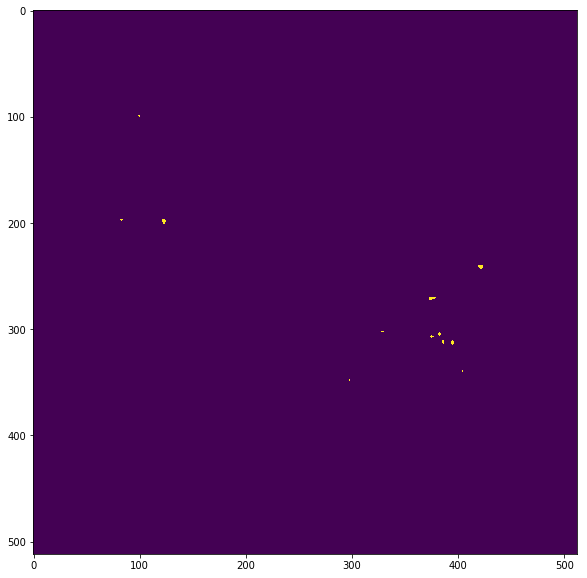

found 12
found 1 loaded particles. 
 Average Ratio: 1.1851851851851851


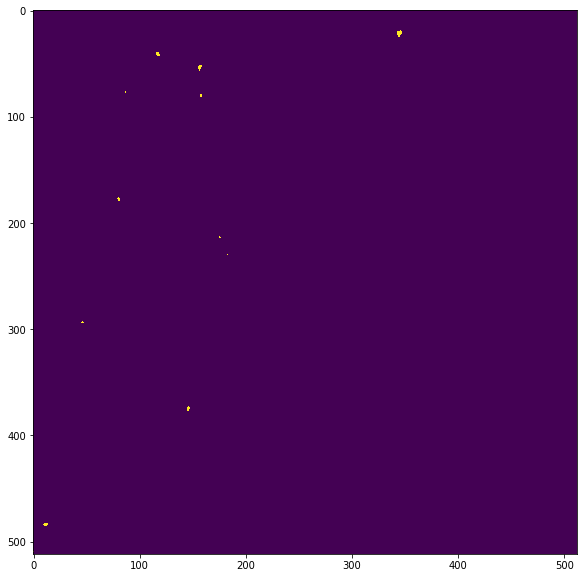

found 12
found 1 loaded particles. 
 Average Ratio: 1.2542372881355932


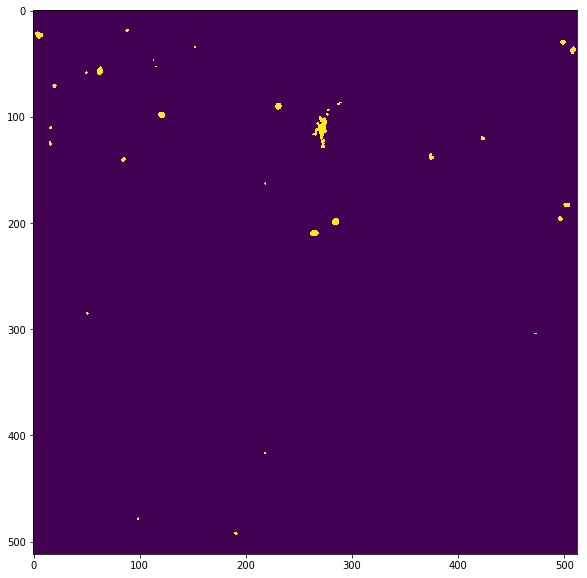

found 31
found 5 loaded particles. 
 Average Ratio: 1.0472734456911508


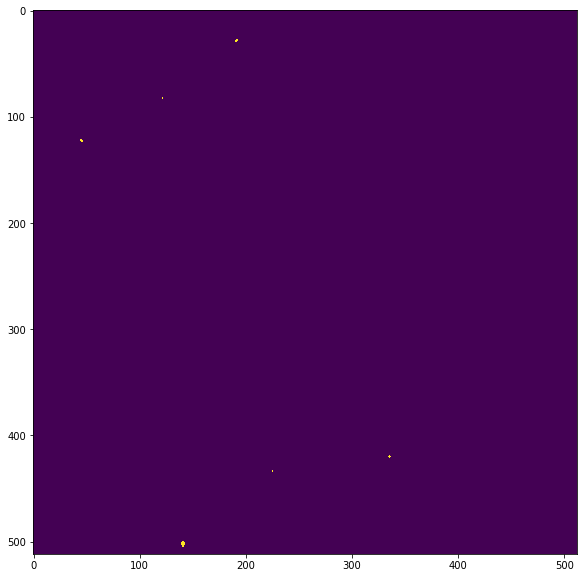

found 6
found 0 loaded particles. 
 Average Ratio: nan


/Users/colinrathbun/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/colinrathbun/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


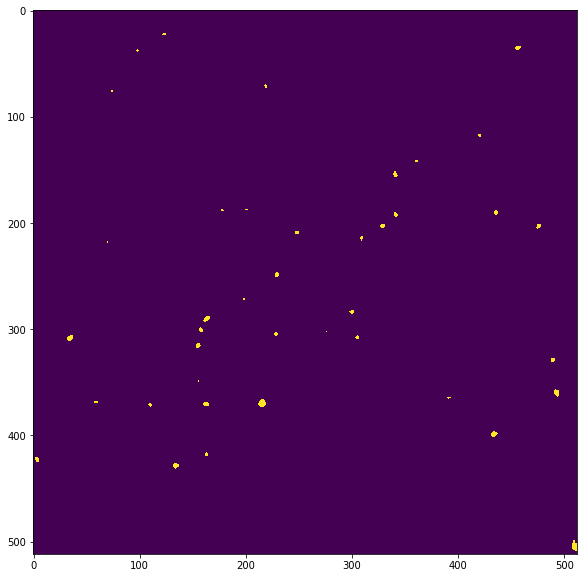

found 40
found 9 loaded particles. 
 Average Ratio: 1.299042946939773


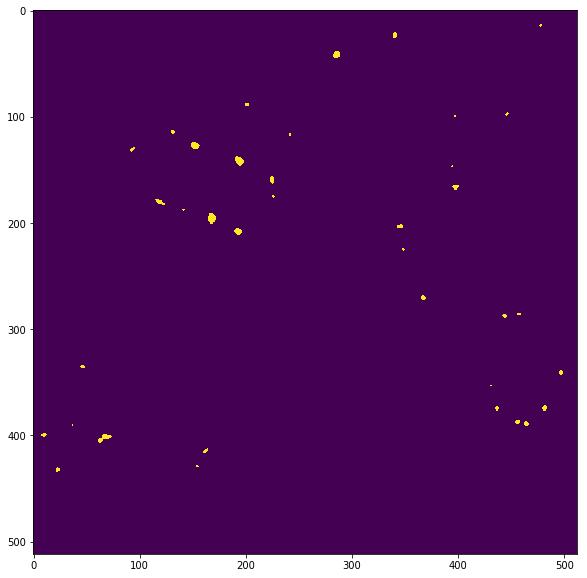

found 37
found 16 loaded particles. 
 Average Ratio: 1.2532531685912838


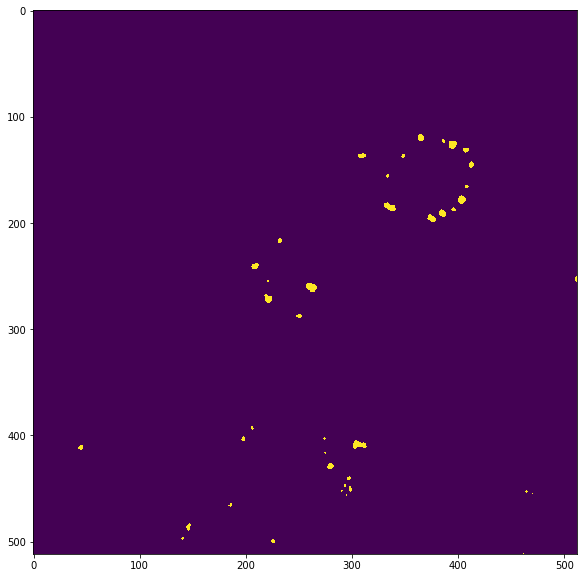

found 40
found 24 loaded particles. 
 Average Ratio: 1.3058471783075851


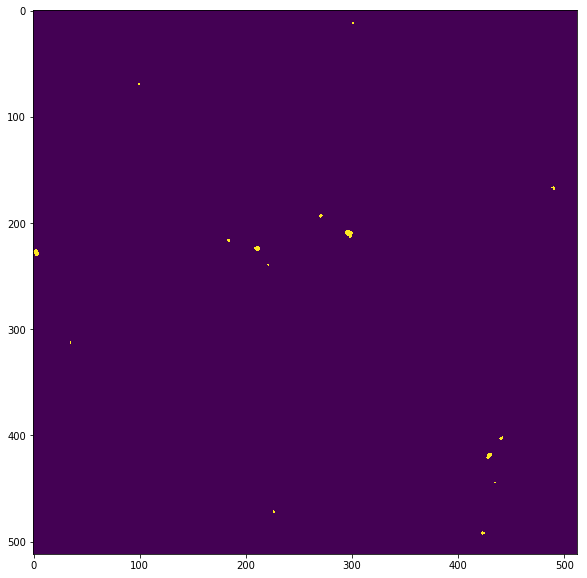

found 15
found 5 loaded particles. 
 Average Ratio: 1.2857263071917724


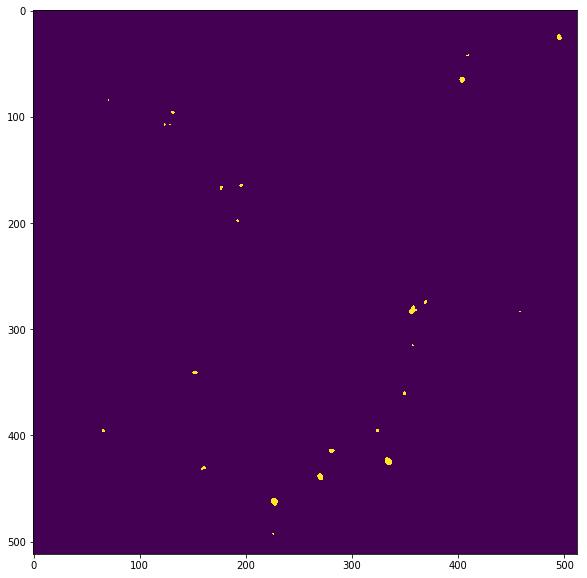

found 24
found 9 loaded particles. 
 Average Ratio: 1.2634850837733167


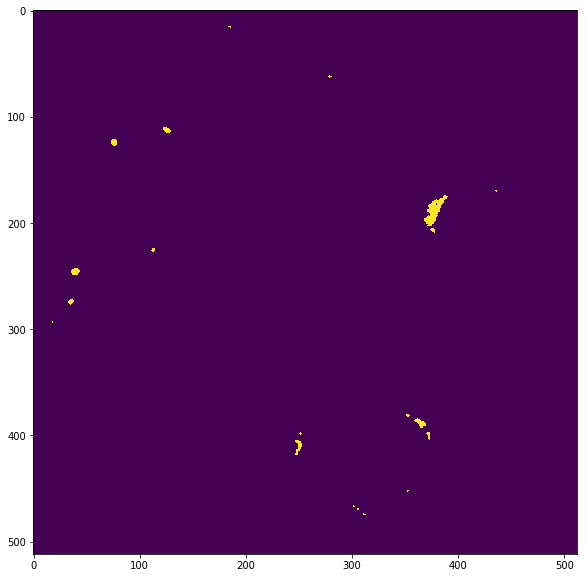

found 20
found 4 loaded particles. 
 Average Ratio: 1.0556692856572516


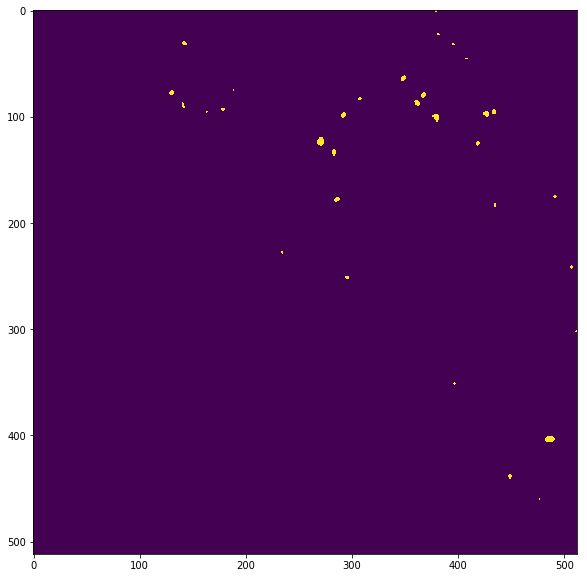

found 32
found 3 loaded particles. 
 Average Ratio: 1.3342132226645758


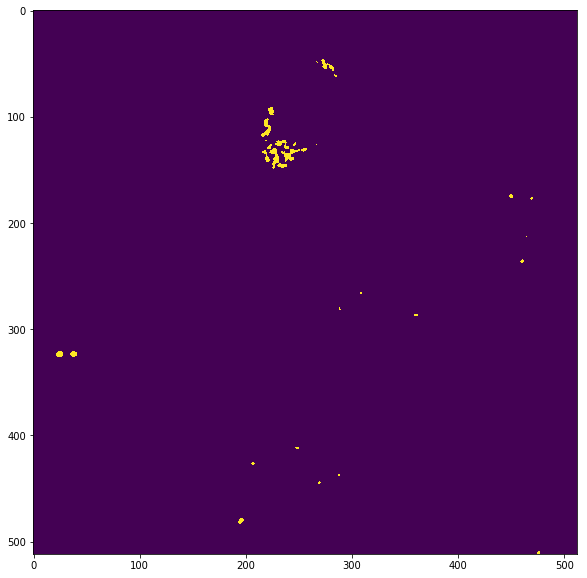

found 31
found 18 loaded particles. 
 Average Ratio: 1.1011811544965253


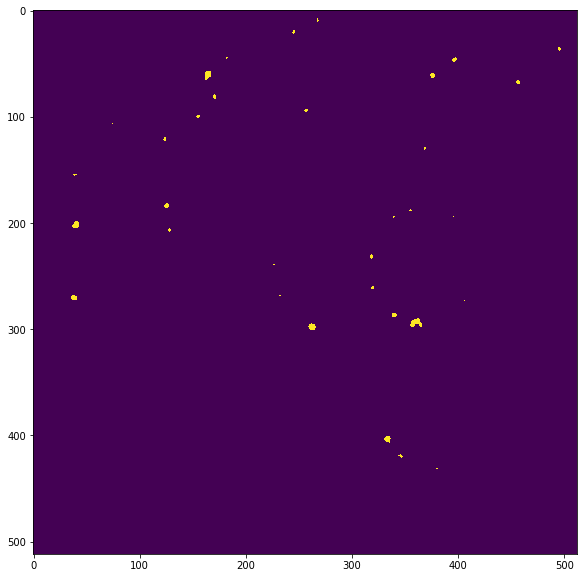

found 33
found 14 loaded particles. 
 Average Ratio: 1.1946453777986263


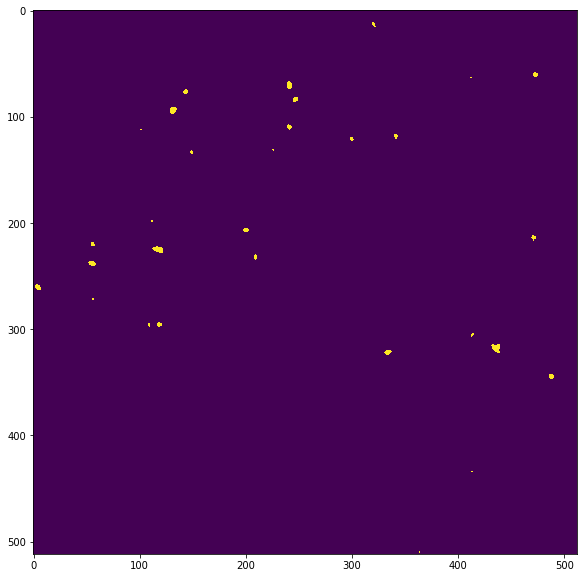

found 30
found 6 loaded particles. 
 Average Ratio: 1.2017014002360757


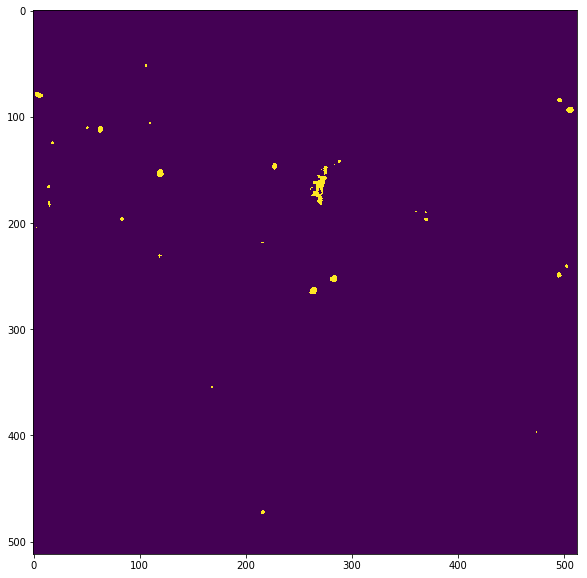

found 33
found 11 loaded particles. 
 Average Ratio: 1.0783977962486715


In [48]:
def process_dir(path_to_dir, RG_background, halo_threshold):
    all_ratios = []
    for filename in listdir(path_to_dir):
        finder = SgFinder(path_to_dir+"/"+filename,RG_background)
        finder.median_filter(3)
        finder.setHaloThreshold(threshold=halo_threshold)
        finder.dilate_and_ratio()
        all_ratios = all_ratios + finder.ratios
    return all_ratios

pos_ratios = process_dir("/Users/colinrathbun/Research/imaging/20180910/singles_pos/", 35, 290)

In [49]:
print(len(pos_ratios))
print(np.mean(pos_ratios))

126
1.2095535994594335


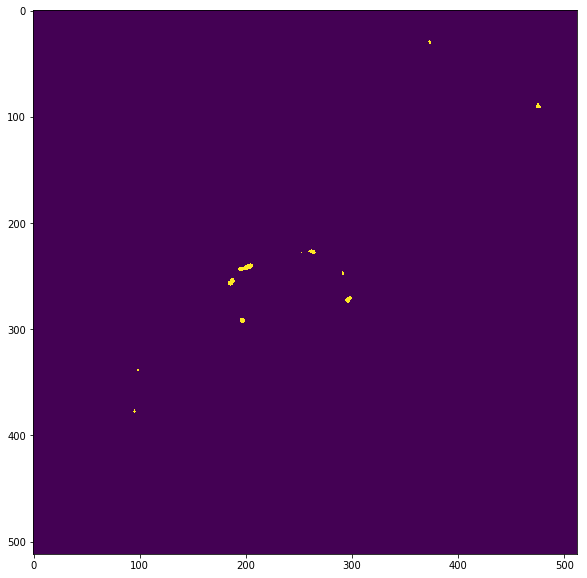

found 11
found 1 loaded particles. 
 Average Ratio: 1.025522041763341


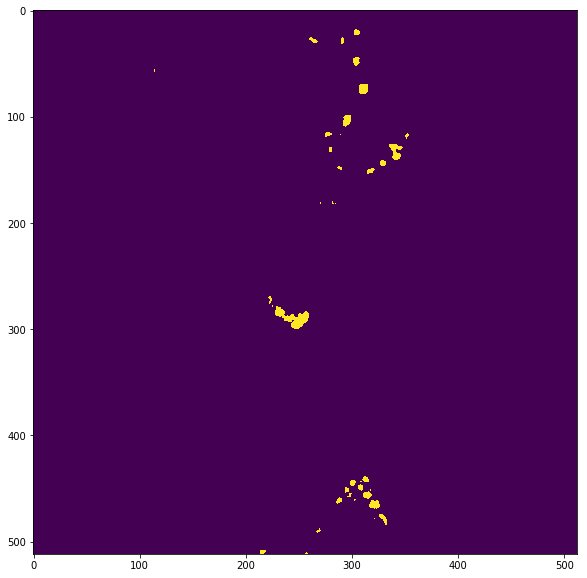

found 37
found 25 loaded particles. 
 Average Ratio: 1.0918954079026586


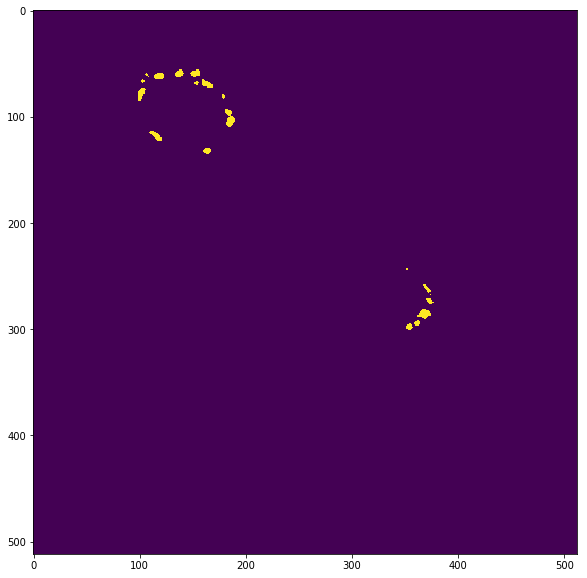

found 20
found 13 loaded particles. 
 Average Ratio: 1.1699161751608904


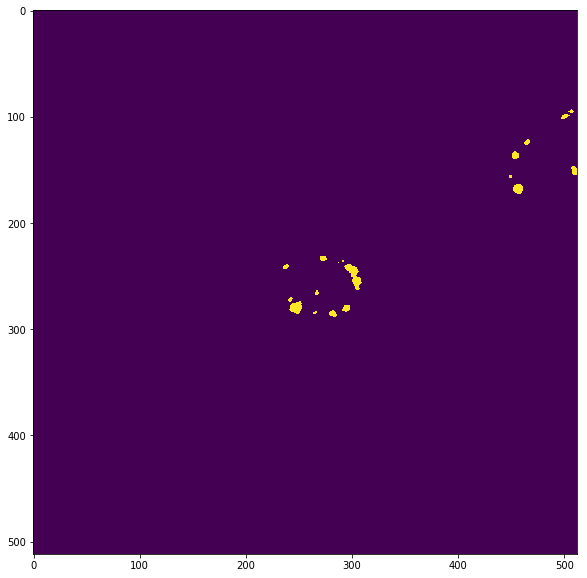

found 18
found 16 loaded particles. 
 Average Ratio: 1.1293826392937993


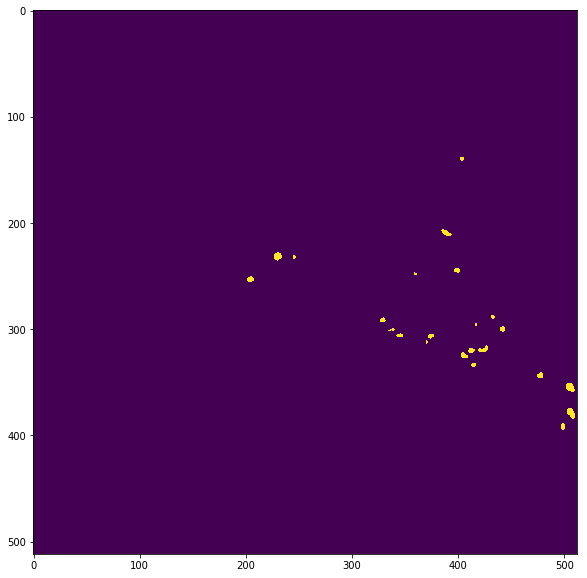

found 23
found 10 loaded particles. 
 Average Ratio: 1.1720047840608672


In [46]:
neg_ratios = process_dir("/Users/colinrathbun/Research/imaging/20180910/singles_neg/", 35, 290)

In [47]:
print(len(neg_ratios))
print(np.mean(neg_ratios))

65
1.1280305782420128
